<a href="https://colab.research.google.com/github/WahyuKhairi06/DIF62130_A_25_2311531009_Wahyu-Khairi/blob/main/Praktikum%204/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset**

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()
# Access the data and target attributes using square brackets
X = iris ['data']
y = iris ['target']

n_samples, n_features = X.shape

print("Number of samples:", n_samples)
print("Number of features:", n_features)

Number of samples: 150
Number of features: 4


# **Visualisasikan menggunkan histogram dan scatter plot**

Untuk Memperoleh gambaran tentang bagaimana fitur (variabel independen) saling terhubung, visualisasikan melalui histogram dan scatter plots.


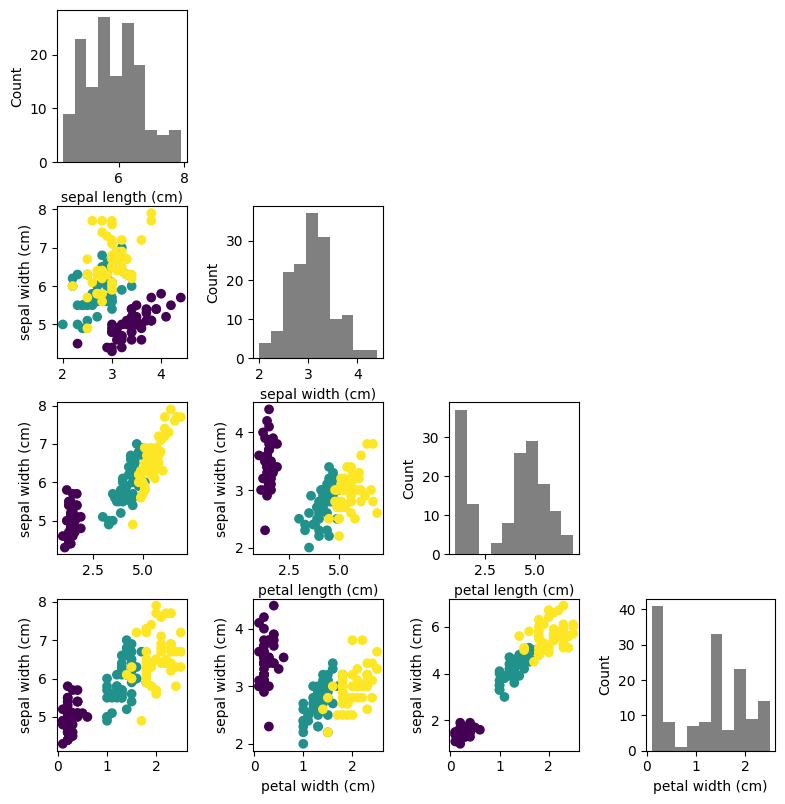

In [15]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize= (8, 8))

fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, j], X[:, i], c = y)
    ax[j, 1].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[1])
    ax[i, j].set_axis_off()

for i in range (n_features):
    ax[i, i].hist(X[:, i], color = 'grey')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])

# **1. Standarisasi Data**
Langkah ini memastikan algoritme (terutama algoritme berbasis jarak) dapat memproses kumpulan data secara efisien. Jika data tidak distandarkan, nilai yang lebih besar mungkin memiliki bobot atau dominasi lebih besar pada algoritme. Semua data harus memiliki bobot yang sama, itulah sebabnya mengapa standarisasi data penting.

Caranya-hitung Z-score (nilai standar) untuk setiap nilai dalam kumpulan data dengan cara mengurangi rata-rata fitur atau kolom dari setiap nilai x dalam kolom dan membaginya dengan deviasi standar σ.

In [16]:
def mean (x): #np.mean(X, axis = 0)
  return sum(x)/len(x)

def std(x): #np.std(X, axis = 0)
  return (sum((i-mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
  return (X-mean(X))/std(X)

X_std = Standardize_data(X)

In [17]:
print(X)
print(X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# **2. Hitung covariance matrix**

In [18]:
def covariance(x):
  return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance (X_std) #np.cov (X_std.T)

# **3. Hitung eigen vectors dan eigen values dari covariance matrix**

In [19]:
from numpy.linalg import eig

#Eigendercomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

#adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T


print('Eigenvalues \n', eig_vals)
print('\nEigenvectors \n', eig_vecs)

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


# **4. Mengurutkan eigenvectors dan eigenvalues**

In [20]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(2.9380850501999918), array([ 0.52106591,  0.37741762,  0.71956635, -0.26128628])), (np.float64(0.920164904162487), array([-0.26934744,  0.92329566, -0.24438178,  0.12350962])), (np.float64(0.14774182104494785), array([ 0.5804131 ,  0.02449161, -0.14212637,  0.80144925])), (np.float64(0.020853862176462023), array([ 0.56485654,  0.06694199, -0.63427274, -0.52359713]))]


# **5. Pilih Principal Components (PC)**

In [21]:
k = 2
W = eig_vecs_sorted[:k, :]

print (W.shape)

(2, 4)


Perhatikan bahwa nilai k dapat diatur dengan cara yang lebih bijak melalui varians yang dijelaskan (explained variance).

Explained variance memberi tahu kita seberapa banyak informasi (variance) yang dapat dikaitkan dengan masing-

masing komponen utama (principal components)

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


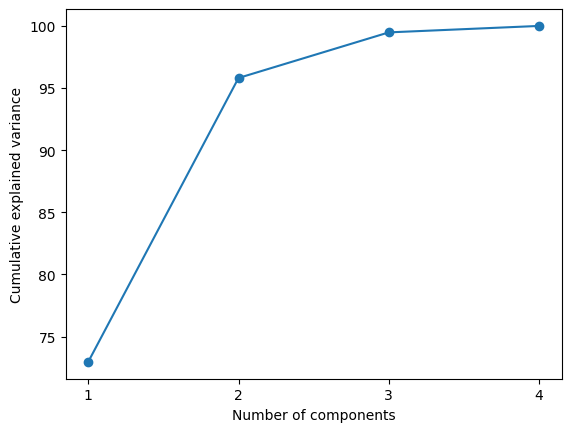

In [22]:
eig_vals_total = sum(eig_vals_sorted)
explained_variance = [(i / eig_vals_total) * 100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1, n_features + 1), cum_explained_variance, '-o')
plt.xticks(np.arange(1, n_features + 1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# **6. Proyeksikan data**

In [23]:
X_proj = X_std.dot(W.T)

print(X_proj. shape) #Dimensi data hasil transformasi
print(X.shape) # Dimensi data awal

(150, 2)
(150, 4)


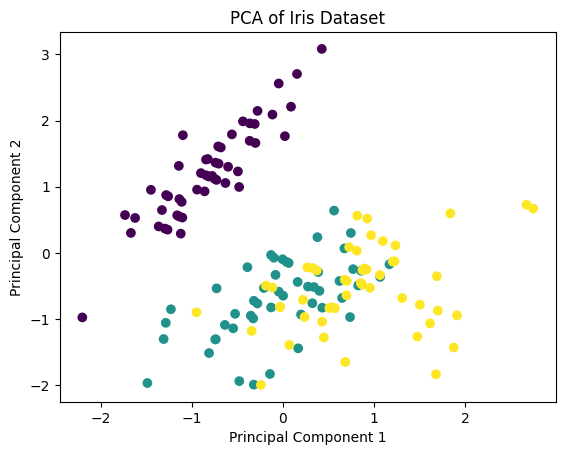

In [25]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

Pada dasarnya, scatter plot digunakan untuk memvisualisasikan hubungan antara dua variabel numerik [1, 2]. Setiap titik pada scatter plot mewakili satu titik data, dan posisi titik tersebut pada sumbu horizontal (x) dan sumbu vertikal (y) menunjukkan nilai dari dua variabel tersebut untuk titik data tersebut [1].

Dalam konteks kode Anda, Anda telah membuat beberapa scatter plot:

Scatter Plot dalam Matriks Plot:

Anda membuat matriks scatter plot untuk memvisualisasikan hubungan antar fitur-fitur asli dari dataset Iris.
Setiap sel di luar diagonal pada matriks ini adalah scatter plot yang menunjukkan hubungan antara dua fitur yang berbeda.
Warna titik-titik pada scatter plot ini mewakili kelas target (species) dari bunga Iris. Ini membantu Anda melihat apakah fitur-fitur tertentu dapat membedakan antara spesies yang berbeda.
Scatter Plot Data yang Diproyeksikan (Setelah PCA Manual):

Setelah melakukan PCA secara manual, Anda memproyeksikan data asli ke dalam ruang berdimensi lebih rendah (dalam kasus ini, 2 dimensi).
Scatter plot ini menunjukkan data yang telah diproyeksikan ke dua komponen utama pertama.
Sumbu horizontal adalah Komponen Utama 1 (Principal Component 1) dan sumbu vertikal adalah Komponen Utama 2 (Principal Component 2).
Warna titik-titik masih mewakili kelas target, menunjukkan bagaimana data dari spesies yang berbeda tersebar di ruang komponen utama.
Scatter Plot Data yang Diproyeksikan (Setelah PCA dengan Scikit-learn):

Ini mirip dengan scatter plot sebelumnya, tetapi menggunakan implementasi PCA dari Scikit-learn.
Scatter plot ini juga menunjukkan data yang diproyeksikan ke dua komponen utama pertama.
Tujuan dari scatter plot ini adalah untuk memvisualisasikan hasil PCA dan melihat seberapa baik dua komponen utama pertama dapat menangkap variasi dalam data dan memisahkan kelas target.
Secara inti, scatter plot dalam analisis Anda berfungsi untuk:

Menunjukkan hubungan antar fitur asli.
Memvisualisasikan data setelah dilakukan reduksi dimensi dengan PCA.
Mengevaluasi seberapa baik PCA dapat memisahkan kelas-kelas yang berbeda dalam dataset.

# **PCA Scikit Learn**

Menggunakan implementasi PCA yang efisien dari Scikit-learn untuk mengurangi dimensi dataset Iris dari 4 fitur menjadi 2 komponen utama. Tujuan utamanya adalah untuk mempertahankan varians sebanyak mungkin dari data asli dalam jumlah dimensi yang lebih sedikit, sehingga memudahkan visualisasi dan berpotensi meningkatkan kinerja algoritma machine learning yang sensitif terhadap dimensi tinggi. Plot yang dihasilkan menunjukkan bagaimana data tersebar dalam ruang 2-dimensi yang baru, dan persentase varians yang dijelaskan memberikan ukuran seberapa baik reduksi dimensi ini mempertahankan informasi penting.

Explained variance ratio:
 [0.72962445 0.22850762]
Cumulative explained variance:
 [0.72962445 0.95813207]
Original data shape: (150, 4)
Transformed data shape: (150, 2)


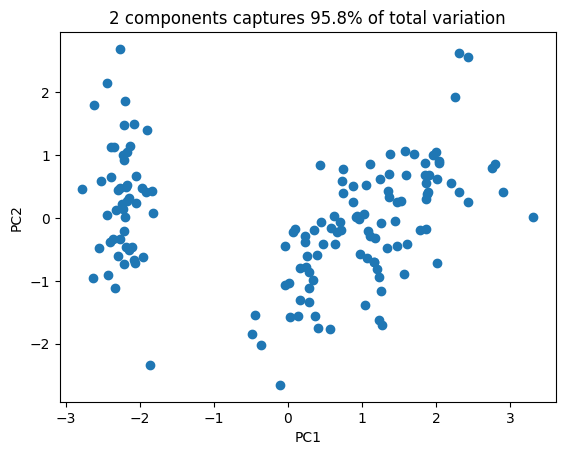

In [24]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

print("Explained variance ratio:\n", pca.explained_variance_ratio_)
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:\n", cum_explained_variance)

print("Original data shape:", X.shape)
print("Transformed data shape:", X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("2 components captures {:.1f}% of total variation".format(cum_explained_variance[1] * 100))
plt.show()